In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import plotly.plotly as py
# import plotly.graph_objs as go

%matplotlib notebook

In [2]:
# Read unprocessed data (old and new datasets already merged)
df_vegas_business = pd.read_json('vegas_dataset_business.json',lines = True)

In [3]:
# print
df_vegas_business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,,"{u'RestaurantsTableService': u'False', u'GoodF...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{u'Sunday': u'17:0-23:0', u'Friday': u'17:0-23...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
1,703 N Rancho Dr,"{u'BusinessAcceptsCreditCards': u'True', u'Res...",hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,NaN,1,36.178348,-115.176916,Citi Trends,,89106,4,4.0,NV
2,1549 N Rancho Dr,NaN,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,"{u'Monday': u'10:0-19:0', u'Tuesday': u'10:0-1...",1,36.188386,-115.186124,Nevada Title And Payday Loans,,89106,4,1.0,NV
3,"3940 Martin Luther King Blvd, Ste 101","{u'BusinessAcceptsCreditCards': u'True', u'Bik...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,"{u'Tuesday': u'11:0-18:0', u'Friday': u'11:0-1...",0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV
4,,{u'BusinessAcceptsCreditCards': u'True'},YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,NaN,1,36.260816,-115.171130,Park Stone Pavers,,89031,20,5.0,NV


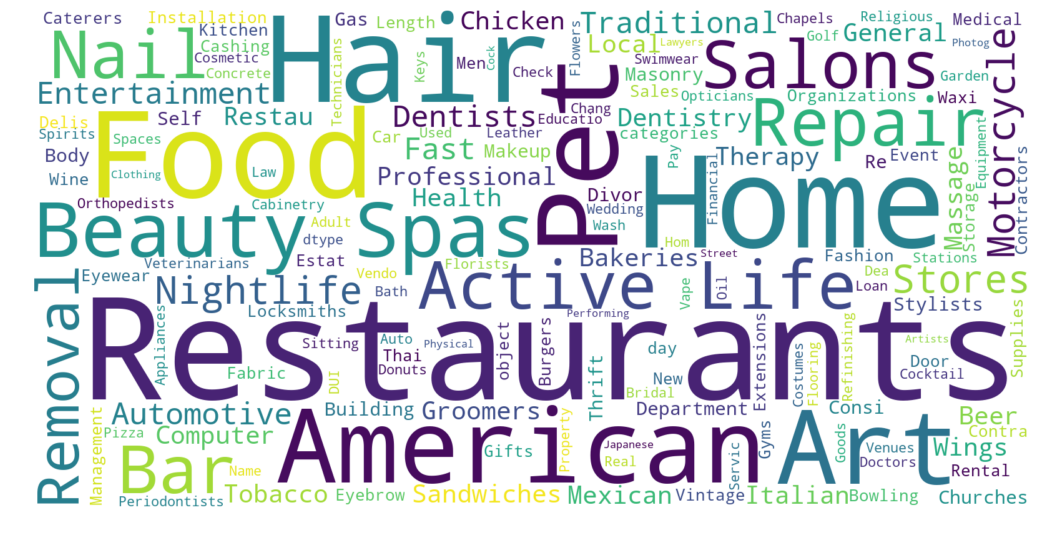

In [4]:
# define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["Shopping", "Services", "Shop", "Shops"])

# create a word cloud
wc = WordCloud(width = 1600, height = 800, 
               random_state = 1, max_words = 200000000, 
               stopwords = stopwords, background_color = "white")
wc.generate(str(df_vegas_business["categories"]))

# declare our figure 
plt.figure(figsize = (20, 10), facecolor = 'white')
# add title to the graph
# plt.title("Categories", fontsize = 40, color = "Black")
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 10)

# save
plt.savefig("categories.png", formate = "png")

# after lot of congiguration finally plot the graph
plt.show()

Text(0,0.5,'Total Number of Restaurants')

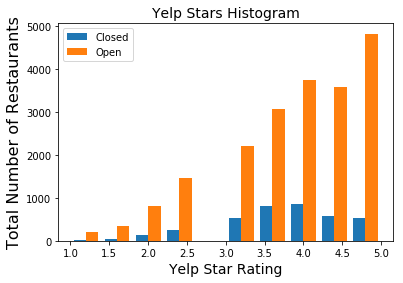

In [5]:
# opening status
plt.hist([df_vegas_business[df_vegas_business['is_open'] == 0].dropna()['stars'].values,\
          df_vegas_business[df_vegas_business['is_open'] == 1].dropna()['stars'].values],\
        label=['Closed', 'Open'])

plt.legend()
plt.title('Yelp Stars Histogram', fontsize = 14)
plt.xlabel('Yelp Star Rating', fontsize = 14)
plt.ylabel('Total Number of Restaurants', fontsize = 16)

Text(0,0.5,'Percentages per Category (%)')

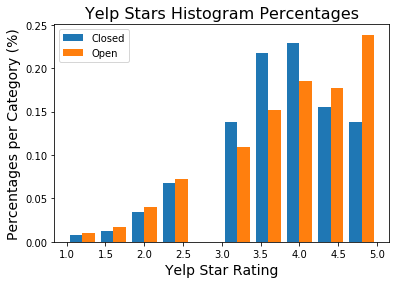

In [6]:
# nomred
open_length = len(df_vegas_business[df_vegas_business['is_open'] == 1].dropna()['stars'])
closed_length = len(df_vegas_business[df_vegas_business['is_open'] == 0].dropna()['stars'])

weights = [np.ones(closed_length) / closed_length, np.ones(open_length) / open_length]

plt.hist([df_vegas_business[df_vegas_business['is_open'] == 0].dropna()['stars'].values,\
          df_vegas_business[df_vegas_business['is_open'] == 1].dropna()['stars'].values],\
        label=['Closed', 'Open'], weights = weights)

plt.legend()
plt.title('Yelp Stars Histogram Percentages', fontsize = 16)
plt.xlabel('Yelp Star Rating', fontsize = 14)
plt.ylabel('Percentages per Category (%)', fontsize = 14)

Text(0.5,0,'Total Number of Reviews')

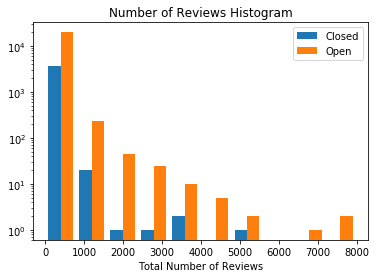

In [7]:
plt.hist([df_vegas_business[df_vegas_business['is_open'] == 0].dropna()['review_count'].values,\
          df_vegas_business[df_vegas_business['is_open'] == 1].dropna()['review_count'].values],\
        label=['Closed', 'Open'], log=True)

plt.legend()
plt.title('Number of Reviews Histogram')
plt.xlabel('Total Number of Reviews')

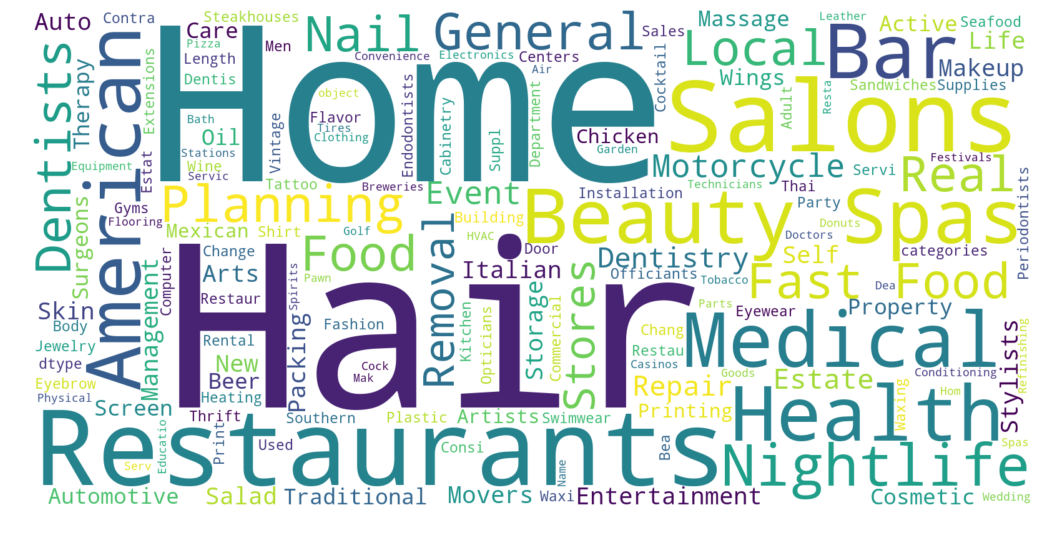

In [8]:
# open
stopwords = set(STOPWORDS)
stopwords.update(["Shopping", "Services", "Shop", "Shops"])

# create a word cloud
wc = WordCloud(width = 1600, height = 800, 
               random_state = 1, max_words = 200000000, 
               stopwords = stopwords, background_color = "white")
wc.generate(str(df_vegas_business[df_vegas_business["is_open"] == 1].dropna()["categories"]))

# declare our figure 
plt.figure(figsize = (20, 10), facecolor = 'white')
# add title to the graph
# plt.title("Categories", fontsize = 40, color = "Black")
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 10)

# save
plt.savefig("categories_open.png", formate = "png")

# after lot of congiguration finally plot the graph
plt.show()

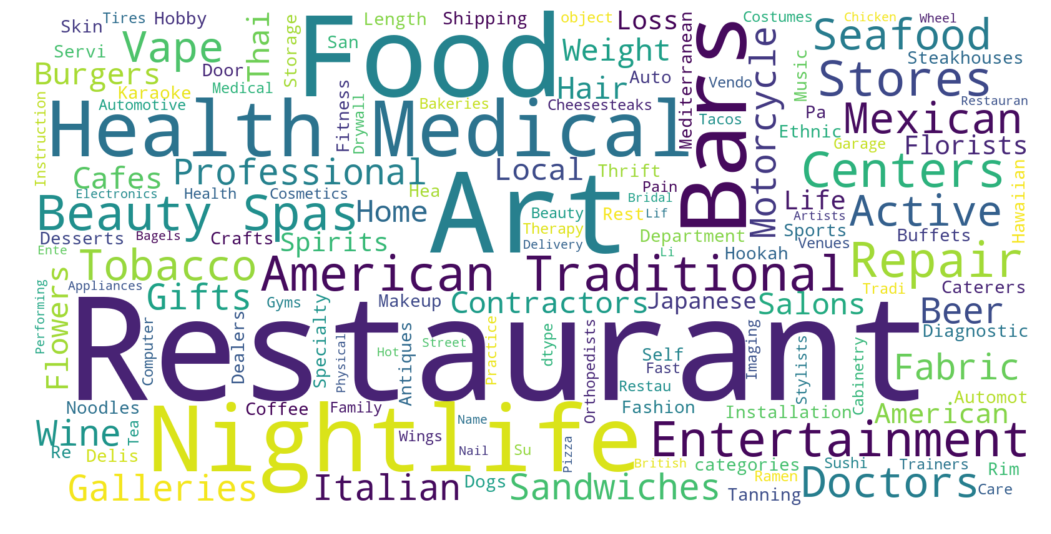

In [9]:
# closed
stopwords = set(STOPWORDS)
stopwords.update(["Shopping", "Services", "Shop", "Shops"])

# create a word cloud
wc = WordCloud(width = 1600, height = 800, 
               random_state = 1, max_words = 200000000, 
               stopwords = stopwords, background_color = "white")
wc.generate(str(df_vegas_business[df_vegas_business["is_open"] == 0].dropna()["categories"]))

# declare our figure 
plt.figure(figsize = (20, 10), facecolor = 'white')
# add title to the graph
# plt.title("Categories", fontsize = 40, color = "Black")
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 10)

# save
plt.savefig("categories_close.png", formate = "png")

# after lot of congiguration finally plot the graph
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
x = v.fit_transform(df_vegas_business["categories"].values.astype('U'))
x_array = x.toarray()

# shufflue rows and randomly pick 2000 smaples for visualization
np.random.seed(seed = 50)
np.random.shuffle(x_array)
x_array_random = x_array[:2000]

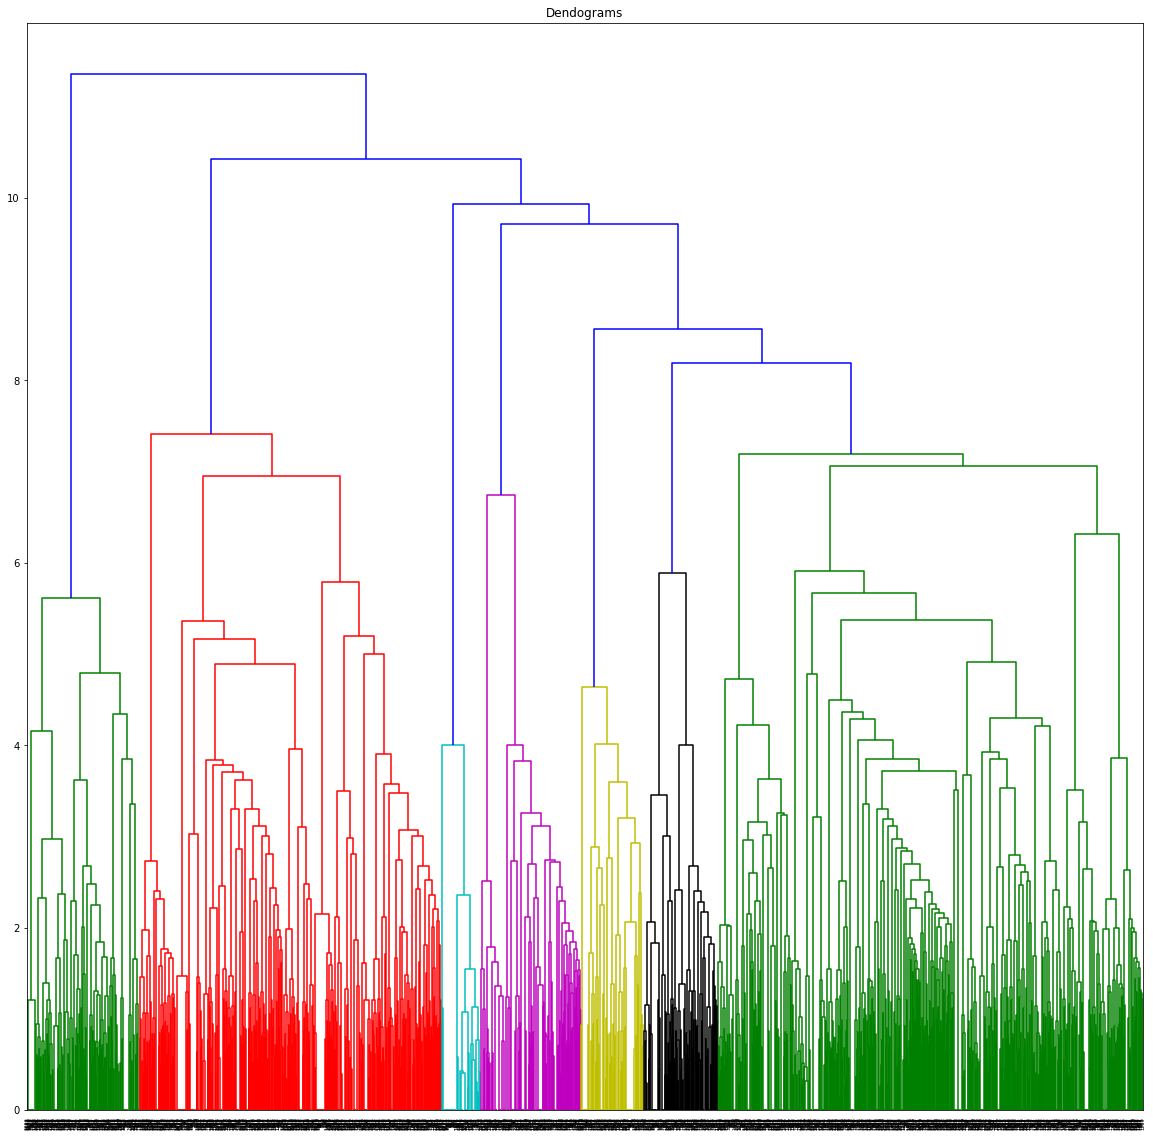

In [11]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (20, 20))  
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(x_array_random, method = 'ward')) 

## clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')  
cluster.fit_predict(x_array_random)
gts = cluster.labels_

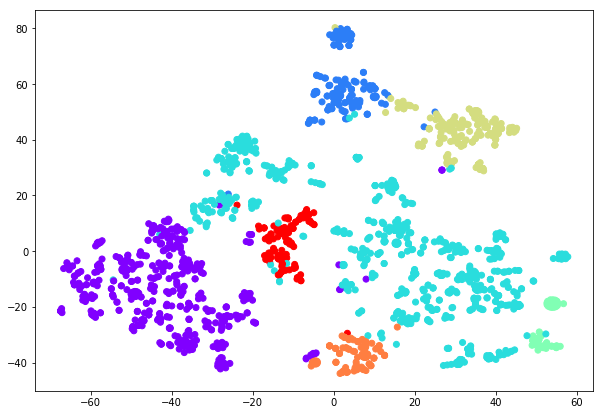

In [13]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(x_array_random)
plt.figure(figsize = (10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = gts, cmap = 'rainbow')

# good

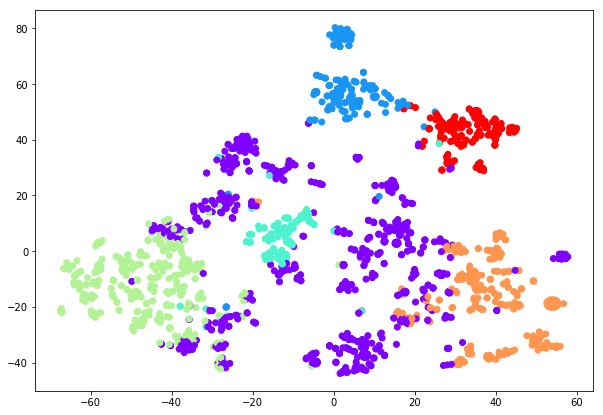

In [14]:
# k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)
kmeans.fit(x_array_random)
y_kmeans = kmeans.predict(x_array_random)

X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(x_array_random)
plt.figure(figsize = (10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y_kmeans, cmap = 'rainbow')

# good but...

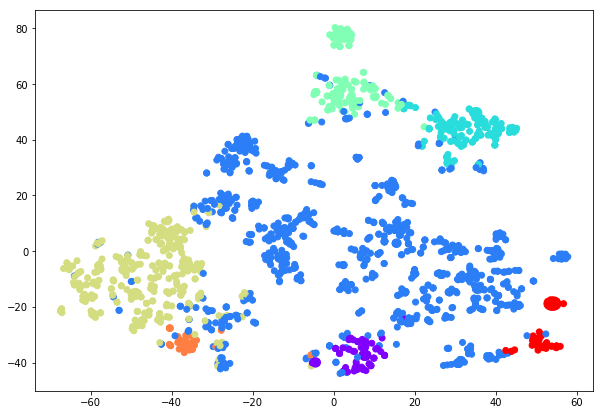

In [15]:
# Spectral
import sklearn.cluster as cluster
SpectralCluster = cluster.SpectralClustering(n_clusters = 7)
SpectralCluster.fit(x_array_random)
y_SpectralCluster = SpectralCluster.labels_

X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(x_array_random)
plt.figure(figsize = (10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y_SpectralCluster, cmap = 'rainbow')

#good

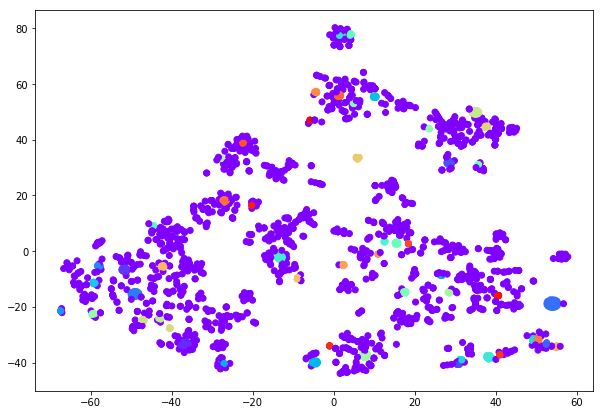

In [16]:
# Assume a dense region
# DBSCAN
DBSCAN = cluster.DBSCAN(eps = 0.0025)
DBSCAN.fit(x_array_random)
y_DBSCAN = DBSCAN.labels_

X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(x_array_random)
plt.figure(figsize = (10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y_DBSCAN, cmap = 'rainbow')

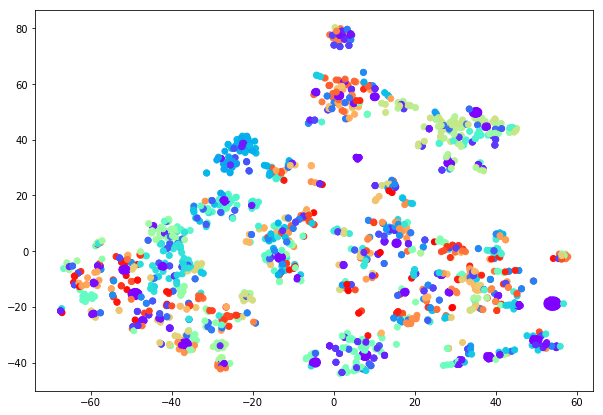

In [17]:
# Meanshift
MeanShift = cluster.MeanShift(0.175, cluster_all = True)
MeanShift.fit(x_array_random)
y_MeanShift = MeanShift.labels_

X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(x_array_random)
plt.figure(figsize = (10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y_MeanShift, cmap = 'rainbow')

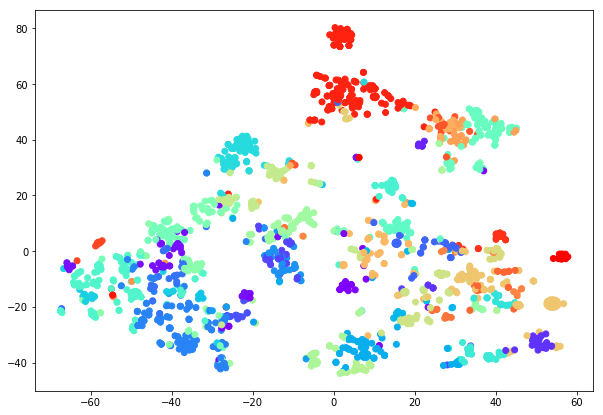

In [18]:
# AffinityPropagation
AffinityPropagation = cluster.AffinityPropagation(preference = -5.0, damping = 0.95)
AffinityPropagation.fit(x_array_random)
y_AffinityPropagation = AffinityPropagation.labels_

X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(x_array_random)
plt.figure(figsize = (10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = y_AffinityPropagation, cmap = 'rainbow')

### use Agglomerative clustering or SpectralClustering, and k - means

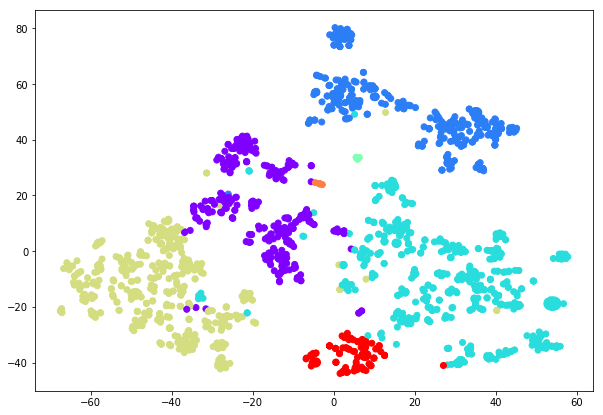

In [19]:
# from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'cosine', linkage = "average")  
cluster.fit_predict(x_array_random)
gts = cluster.labels_

X_embedded = TSNE(n_components = 2, random_state = 50).fit_transform(x_array_random)
plt.figure(figsize = (10, 7))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = gts, cmap = 'rainbow')

In [20]:
# from sklearn.cluster import AgglomerativeClustering
'''
cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')  
cluster.fit_predict(x.toarray())
gts = cluster.labels_
'''
cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'cosine', linkage = "average")  
cluster.fit_predict(x.toarray())
gts = cluster.labels_

In [21]:
print len(gts) == len(df_vegas_business)
print type(gts)
print gts.shape
print df_vegas_business.shape

True
<type 'numpy.ndarray'>
(35173,)
(35173, 15)


In [23]:
# create category cluster column
df_vegas_business_with_chain = pd.read_json('vegas_buiness_with_chain.json',lines = True)
df_vegas_business_with_chain["cluster_label_AgglomerativeClustering"] = 0

for index, _ in df_vegas_business.iterrows():
    df_vegas_business_with_chain.loc[index, "cluster_label_AgglomerativeClustering"] = gts[index]

In [24]:
df_vegas_business_with_chain.head() #[["name", "is_chain", "cluster_label_AgglomerativeClustering"]].head()

,address,attributes,business_id,categories,city,hours,is_chain,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,cluster_label_AgglomerativeClustering
0,,"{u'GoodForMeal': u'{'dessert': False, 'latenig...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{u'Sunday': u'17:0-23:0', u'Friday': u'17:0-23...",0,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV,4
1,703 N Rancho Dr,"{u'BusinessAcceptsCreditCards': u'True', u'Res...",hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,None,1,1,36.178348,-115.176916,Citi Trends,,89106,4,4.0,NV,0
2,1549 N Rancho Dr,None,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,"{u'Monday': u'10:0-19:0', u'Tuesday': u'10:0-1...",0,1,36.188386,-115.186124,Nevada Title And Payday Loans,,89106,4,1.0,NV,0
3,"3940 Martin Luther King Blvd, Ste 101","{u'BusinessAcceptsCreditCards': u'True', u'Bik...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,"{u'Tuesday': u'11:0-18:0', u'Friday': u'11:0-1...",0,0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV,4
4,,{u'BusinessAcceptsCreditCards': u'True'},YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,None,0,1,36.260816,-115.171130,Park Stone Pavers,,89031,20,5.0,NV,0


In [25]:
# save as a json file
df_vegas_business_with_chain.to_json("vegas_buiness_with_chain_cluster.json", orient = 'records', lines = True)

In [26]:
df = pd.read_json('vegas_buiness_with_chain_cluster.json', lines = True)
df.head() #[["name", "is_chain", "cluster_label_AgglomerativeClustering", "categories"]].head()

,address,attributes,business_id,categories,city,cluster_label_AgglomerativeClustering,hours,is_chain,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,,"{u'BusinessParking': u'{'garage': False, 'stre...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,4,"{u'Sunday': u'17:0-23:0', u'Friday': u'17:0-23...",0,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
1,703 N Rancho Dr,"{u'BusinessAcceptsCreditCards': u'True', u'Res...",hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,0,None,1,1,36.178348,-115.176916,Citi Trends,,89106,4,4.0,NV
2,1549 N Rancho Dr,None,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,0,"{u'Monday': u'10:0-19:0', u'Tuesday': u'10:0-1...",0,1,36.188386,-115.186124,Nevada Title And Payday Loans,,89106,4,1.0,NV
3,"3940 Martin Luther King Blvd, Ste 101","{u'BusinessAcceptsCreditCards': u'True', u'Bik...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,4,"{u'Tuesday': u'11:0-18:0', u'Friday': u'11:0-1...",0,0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV
4,,{u'BusinessAcceptsCreditCards': u'True'},YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,0,None,0,1,36.260816,-115.171130,Park Stone Pavers,,89031,20,5.0,NV


## k-means

In [27]:
kmeans = KMeans(n_clusters = 6).fit(x.toarray())
gts_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

In [28]:
print len(gts_kmeans), set(gts_kmeans)
print len(centroids)
print type(centroids), centroids.shape
centroid_shape = centroids.shape
N = len(gts_kmeans)
print centroid_shape[1]

35173 set([0, 1, 2, 3, 4, 5])
6
<type 'numpy.ndarray'> (6, 1273)
1273


In [29]:
# create new col
df["cluster_label_kMeans"] = 0
df["cluster_kMeans_centroid"] = [np.zeros((centroid_shape[1], )) for _ in range(N)]

In [30]:
for index, _ in df.iterrows():
    df.loc[index, "cluster_label_kMeans"] = gts_kmeans[index]
    # print centroids[gts_kmeans[index]], type(centroids[gts_kmeans[index]])
    # print df["cluster_kMeans_centroid"][index], df["cluster_kMeans_centroid"][index].shape
    update = centroids[gts_kmeans[index]]
    # print update, update.shape
    df.at[index, "cluster_kMeans_centroid"] = update
    # break

In [31]:
df.head() #[["name", "is_chain", "cluster_label_AgglomerativeClustering", "cluster_label_kMeans", "cluster_kMeans_centroid"]].head()

,address,attributes,business_id,categories,city,cluster_label_AgglomerativeClustering,hours,is_chain,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,cluster_label_kMeans,cluster_kMeans_centroid
0,,"{u'BusinessParking': u'{'garage': False, 'stre...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,4,"{u'Sunday': u'17:0-23:0', u'Friday': u'17:0-23...",0,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV,0,"[-1.6008922703106276e-18, -1.5937771935536915e..."
1,703 N Rancho Dr,"{u'BusinessAcceptsCreditCards': u'True', u'Res...",hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,0,None,1,1,36.178348,-115.176916,Citi Trends,,89106,4,4.0,NV,0,"[-1.6008922703106276e-18, -1.5937771935536915e..."
2,1549 N Rancho Dr,None,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,0,"{u'Monday': u'10:0-19:0', u'Tuesday': u'10:0-1...",0,1,36.188386,-115.186124,Nevada Title And Payday Loans,,89106,4,1.0,NV,4,"[3.800837495365882e-05, 0.00020161133043910764..."
3,"3940 Martin Luther King Blvd, Ste 101","{u'BusinessAcceptsCreditCards': u'True', u'Bik...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,4,"{u'Tuesday': u'11:0-18:0', u'Friday': u'11:0-1...",0,0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV,0,"[-1.6008922703106276e-18, -1.5937771935536915e..."
4,,{u'BusinessAcceptsCreditCards': u'True'},YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,0,None,0,1,36.260816,-115.171130,Park Stone Pavers,,89031,20,5.0,NV,4,"[3.800837495365882e-05, 0.00020161133043910764..."


In [32]:
# save as a json file
df.to_json("vegas_buiness_with_chain_cluster_2.json", orient = 'records', lines = True)

In [33]:
df_test = pd.read_json('vegas_buiness_with_chain_cluster_2.json', lines = True)
df_test.head()
# df_test[["name", "is_chain", "cluster_label_AgglomerativeClustering", "categories", "cluster_label_kmeans", "cluster_kMeans_centroid"]].head()

,address,attributes,business_id,categories,city,cluster_kMeans_centroid,cluster_label_AgglomerativeClustering,cluster_label_kMeans,hours,is_chain,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,,"{u'RestaurantsTableService': u'False', u'GoodF...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,"{u'Sunday': u'17:0-23:0', u'Friday': u'17:0-23...",0,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
1,703 N Rancho Dr,"{u'BusinessAcceptsCreditCards': u'True', u'Res...",hTzcHtk4-0QJnFUbkKpd5Q,"Shopping, Fashion, Department Stores",Las Vegas,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",0,0,None,1,1,36.178348,-115.176916,Citi Trends,,89106,4,4.0,NV
2,1549 N Rancho Dr,None,UwIpS9UKsPiKAv1fiEYhqg,"Financial Services, Check Cashing/Pay-day Loan...",Las Vegas,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,"{u'Monday': u'10:0-19:0', u'Tuesday': u'10:0-1...",0,1,36.188386,-115.186124,Nevada Title And Payday Loans,,89106,4,1.0,NV
3,"3940 Martin Luther King Blvd, Ste 101","{u'BusinessAcceptsCreditCards': u'True', u'Bik...",vJIuDBdu01vCA8y1fwR1OQ,"American (Traditional), Food, Bakeries, Restau...",Las Vegas,"[-1.60089227e-18, -1.593777194e-17, 0.00051696...",4,0,"{u'Tuesday': u'11:0-18:0', u'Friday': u'11:0-1...",0,0,36.192284,-115.159272,CakesbyToi,,89106,3,1.5,NV
4,,{u'BusinessAcceptsCreditCards': u'True'},YZCHr68c5aEVHz0bkq9K2g,"Home Services, Masonry/Concrete, Professional ...",Las Vegas,"[3.80084e-05, 0.0002016113, -3.29868511e-17, 0...",0,4,None,0,1,36.260816,-115.171130,Park Stone Pavers,,89031,20,5.0,NV
